# 2 Data wrangling<a id='2_Data_wrangling'></a>

The purpose of this data science project is to develop a predictive model to anticipate what inflation in the United States will be measured as the Consumer Price Index for All Urban Consumers in the United States ( “Inflation” ). Inflation is an important component of developing investment strategies for portfolios across the world. The view on inflation being positive or negative is not agreed upon nor are the variables which influence it.

In this project, I have shortlisted seven ( 8 ) variables to determine their influence on predicting annual growth in inflation ahead of time on different time spans; notably, one quarter, six months or one year out ( this may change after initial review is commenced ).

## 2.3 Imports<a id='2.3_Imports'></a>

In [122]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import quandl
from fredapi import Fred
from getpass import getpass

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np



In [123]:
# Here we are ensuring the imported Quandl API has the necessary password
my_quandl_API = getpass()

········


In [124]:
quandl.ApiConfig.api_key = my_quandl_API

In [125]:
# Here we are ensuring the imported FRED API has the necessary password
my_FRED_API = getpass()

········


In [126]:
fred = Fred(api_key=my_FRED_API)

## 2.5 Loaded Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [127]:
# Daily Data
us_usd = quandl.get('CHRIS/ICE_DX1')
us_wti = quandl.get('CHRIS/CME_CL1')

# Weekly Data
us_M2 = fred.get_series('M2')

# Monthly Data
us_cpi = quandl.get('RATEINF/INFLATION_USA')
# us_wages_hrly_earnings = fred.get_series('CES0500000003') # this was removed due to amount of data
# us_wages_compensation = fred.get_series('A576RC1') # poor results
us_wages_cpi = fred.get_series('CWSR0000SA0')
us_cap_util = fred.get_series('TCU')

# Quarterly Data
m2_velo = fred.get_series('M2V')
us_gdp = fred.get_series('GDP')


In [128]:
# As the purpose of this section is to accumulate all the data into one spot to cross reference future works integrity,
# I will keep Inflation here

main_df = pd.concat([us_cpi,us_usd['Settle'],us_wti['Last'],us_M2,
                       us_wages_cpi,us_gdp,us_cap_util,m2_velo],
                      axis = 1, ignore_index=False)

main_df = main_df.fillna(method='ffill')
main_df.columns = ['Inflation','USD','WTI','M2','Wage CPI','GDP','Cap Util','M2 Velocity']
main_df['Inflation'].index
main_df.index.names = ["Date"]
# main_df = main_df.sort_values(by="Date", ascending=False)

In [129]:
main_df.tail()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
2021-02-08,1.4,90.919,58.10,19414.9,256.044,21479.529,74.5445,1.129
2021-02-09,1.4,90.429,58.38,19414.9,256.044,21479.529,74.5445,1.129
2021-02-10,1.4,90.363,58.39,19414.9,256.044,21479.529,74.5445,1.129
2021-02-11,1.4,90.413,57.91,19414.9,256.044,21479.529,74.5445,1.129
2021-02-12,1.4,90.470,59.71,19414.9,256.044,21479.529,74.5445,1.129


In [130]:
#Call the info method on main_df to see a summary of the data
main_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11439 entries, 1914-01-31 to 2021-02-12
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    11439 non-null  float64
 1   USD          9356 non-null   float64
 2   WTI          10054 non-null  float64
 3   M2           10226 non-null  float64
 4   Wage CPI     11039 non-null  float64
 5   GDP          11039 non-null  float64
 6   Cap Util     10559 non-null  float64
 7   M2 Velocity  10751 non-null  float64
dtypes: float64(8)
memory usage: 804.3 KB


`Inflation` has by and large the most date while `USD` has the least. Let's move forward with using the `USD` amount limitations

In [131]:
# I will move forward with only the data where all information is present

main_df = main_df.iloc[2083:,]  # this is the most sophisticated way I could develop

In [132]:
# Most importantly double check to determine if there are no null values
# Please note, these numbers change on 2 fronts; it changes everytime you run the previous code; FYI you should have 9349(+)
# and the reason for the (+) is due to more information being added to the API's daily 

main_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9356 entries, 1985-11-20 to 2021-02-12
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    9356 non-null   float64
 1   USD          9356 non-null   float64
 2   WTI          9356 non-null   float64
 3   M2           9356 non-null   float64
 4   Wage CPI     9356 non-null   float64
 5   GDP          9356 non-null   float64
 6   Cap Util     9356 non-null   float64
 7   M2 Velocity  9356 non-null   float64
dtypes: float64(8)
memory usage: 657.8 KB


In [133]:
# Call the head method on main_df to ensure you don't have any null's at the back ( year = ~ 1985 )
main_df.head()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
1985-11-20,3.229,128.86,31.72,2473.6,108.2,4444.094,78.6082,1.792
1985-11-21,3.229,127.56,30.82,2473.6,108.2,4444.094,78.6082,1.792
1985-11-22,3.229,126.63,30.91,2473.6,108.2,4444.094,78.6082,1.792
1985-11-25,3.229,126.64,31.01,2479.5,108.2,4444.094,78.6082,1.792
1985-11-26,3.229,126.17,30.74,2479.5,108.2,4444.094,78.6082,1.792


In [134]:
# We will also look at the front end months to quickly referance when looking at results moving foward
main_df.tail()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
2021-02-08,1.4,90.919,58.10,19414.9,256.044,21479.529,74.5445,1.129
2021-02-09,1.4,90.429,58.38,19414.9,256.044,21479.529,74.5445,1.129
2021-02-10,1.4,90.363,58.39,19414.9,256.044,21479.529,74.5445,1.129
2021-02-11,1.4,90.413,57.91,19414.9,256.044,21479.529,74.5445,1.129
2021-02-12,1.4,90.470,59.71,19414.9,256.044,21479.529,74.5445,1.129


In [137]:
# Here I am saving the non-adjusted ( raw ) data to investigate whether the adjustments further along yield correctly
# both here & in the excel being saved below

main_df = main_df.sort_values(by="Date", ascending=False)
main_df_csv = pd.DataFrame(main_df)

main_df_csv.to_excel('./_Capstone_One_Inflation/data/main_df_csv.xlsx')
print('Finished; keep going!')

Finished; keep going!


# 2.5.1 pct changes | Quarter on Quarter pct Changes ( all )<a id='#2.5.1_pct_changes_|_Quarter_on_Quarter_pct_Changes_(_all_)'></a>

In [138]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
Q_USD = us_usd['Settle'].pct_change(periods=66)
Q_WTI = us_wti['Last'].pct_change(periods=66)

# ( Complete ) Wkly | M2 
Q_M2 = us_M2.pct_change(periods=12)

# ( Complete ) Mnthly | Capital Utilization, Wages, Inflation
Q_caputil = us_cap_util.pct_change(periods=3)
Q_wages = us_wages_cpi.pct_change(periods=3)
Q_cpi = us_cpi.pct_change(periods=-3) * -1

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_GDP = us_gdp.pct_change(periods=1)
Q_velomoney = m2_velo.pct_change(periods=1)


In [139]:
# ( Complete ) The above were slow reviewed & they all align with the forward fill modus operandi 

QonQ_vars = pd.concat([Q_USD,Q_WTI,Q_M2,Q_wages,Q_GDP,Q_caputil,Q_velomoney],
                      axis = 1, ignore_index=False)

QonQ_vars = QonQ_vars.fillna(method='ffill')
QonQ_vars.columns = ['USD','WTI','M2','Wage CPI','GDP','Cap Util','M2 Velocity']
QonQ_vars.index.names = ["Date"]
# main_df = main_df.sort_values(by="Date", ascending=False)

In [140]:
# Doing a check to check to ensure there's no misalignment 
QonQ_vars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10483 entries, 1946-01-01 to 2021-02-12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   USD          9164 non-null   float64
 1   WTI          9853 non-null   float64
 2   M2           10059 non-null  float64
 3   Wage CPI     10476 non-null  float64
 4   GDP          10476 non-null  float64
 5   Cap Util     10236 non-null  float64
 6   M2 Velocity  10332 non-null  float64
dtypes: float64(7)
memory usage: 655.2 KB


In [141]:
# There was overlap so keeping them the same here
QonQ_vars = QonQ_vars.iloc[1319:,]  # this is the most sophisticated way I could develop 

In [142]:
QonQ_vars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9164 entries, 1986-02-26 to 2021-02-12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   USD          9164 non-null   float64
 1   WTI          9164 non-null   float64
 2   M2           9164 non-null   float64
 3   Wage CPI     9164 non-null   float64
 4   GDP          9164 non-null   float64
 5   Cap Util     9164 non-null   float64
 6   M2 Velocity  9164 non-null   float64
dtypes: float64(7)
memory usage: 572.8 KB


In [143]:
# Doing another sanity check to ensure the back end is properly filled
# Please be aware that M2 Velocity didn't see a change in Q1/86 from Q4/85: thus it is Zero

QonQ_vars.head()

,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,
1986-02-26,-0.108412,-0.527966,0.014179,0.005545,0.014356,0.004569,0.0
1986-02-27,-0.103559,-0.554455,0.014179,0.005545,0.014356,0.004569,0.0
1986-02-28,-0.090658,-0.581967,0.014179,0.005545,0.014356,0.004569,0.0
1986-03-01,-0.090658,-0.581967,0.014179,-0.005520,0.014356,-0.012286,0.0
1986-03-03,-0.098073,-0.601882,0.013753,-0.005520,0.014356,-0.012286,0.0


In [144]:
# Moving over to the forward dates

QonQ_vars.tail()

,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,
2021-02-08,-0.026678,0.566460,0.022326,0.007345,0.014609,0.030913,-0.015693
2021-02-09,-0.022558,0.530275,0.022326,0.007345,0.014609,0.030913,-0.015693
2021-02-10,-0.020190,0.491824,0.022326,0.007345,0.014609,0.030913,-0.015693
2021-02-11,-0.024829,0.503765,0.022326,0.007345,0.014609,0.030913,-0.015693
2021-02-12,-0.024435,0.592691,0.022326,0.007345,0.014609,0.030913,-0.015693


In [145]:
# I cross referanced them all & they are okay
# Thus, here I am saving the Quater vs Quarter data to its own excel but this is not the end; will add Inflation with them

QonQ_vars = QonQ_vars.sort_values(by="Date", ascending=False)
QonQ_vars_csv = pd.DataFrame(QonQ_vars)

QonQ_vars_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_vars.xlsx')
print('Finished')

Finished


In [146]:
QonQ = Q_cpi.merge(QonQ_vars, how='left', on='Date')
cols = ['USD','WTI','M2','Wage CPI','GDP','Cap Util','M2 Velocity' ]
QonQ.loc[:,cols] = QonQ.loc[:,cols].ffill()
QonQ.columns = ['Inflation','USD','WTI','M2','Wage CPI','GDP','Cap Util','M2 Velocity']
QonQ = QonQ.dropna()

In [147]:
QonQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 417 entries, 1986-02-28 to 2020-10-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    417 non-null    float64
 1   USD          417 non-null    float64
 2   WTI          417 non-null    float64
 3   M2           417 non-null    float64
 4   Wage CPI     417 non-null    float64
 5   GDP          417 non-null    float64
 6   Cap Util     417 non-null    float64
 7   M2 Velocity  417 non-null    float64
dtypes: float64(8)
memory usage: 29.3 KB


In [148]:
QonQ.head()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
1986-02-28,-1.087860,-0.090658,-0.581967,0.014179,0.005545,0.014356,0.004569,0.000000
1986-03-31,-0.277463,-0.064713,-0.595654,0.018631,-0.005520,0.014356,-0.012286,0.000000
1986-04-30,-0.008244,-0.085283,-0.315897,0.025222,-0.012832,0.008307,-0.016204,-0.017857
1986-05-31,0.052732,-0.085283,-0.315897,0.025222,-0.012832,0.008307,-0.016204,-0.017857
1986-06-30,-0.006842,-0.056024,0.063228,0.026041,0.001850,0.008307,-0.003582,-0.017857


In [149]:
QonQ.tail()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
2020-06-30,0.528811,-0.012056,0.717860,0.098473,-0.003327,-0.094662,-0.063696,-0.200579
2020-07-31,0.165821,-0.057630,2.046722,0.037880,0.011164,0.084535,0.117517,0.038949
2020-08-31,-0.114894,-0.063148,0.272511,0.020044,0.016676,0.084535,0.116077,0.038949
2020-09-30,-0.006608,-0.035152,0.044549,0.014599,0.013487,0.084535,0.049903,0.038949
2020-10-31,0.155714,-0.035152,0.044549,0.014599,0.013487,0.084535,0.049903,0.038949


C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

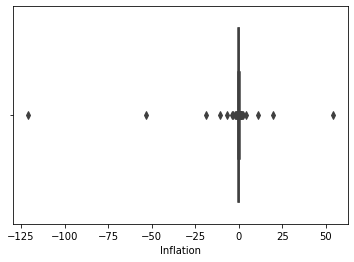

In [150]:
sns.boxplot(QonQ['Inflation'])

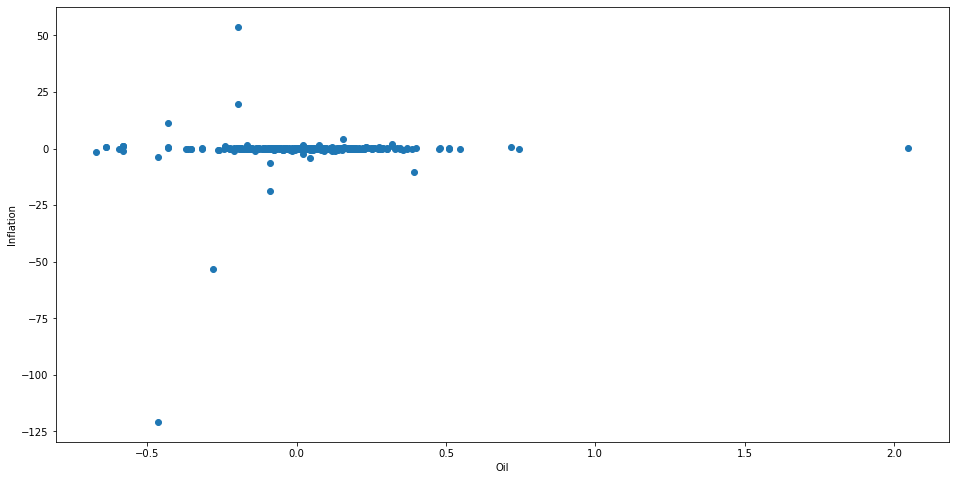

In [151]:
fig, ax =plt.subplots(figsize=(16,8))
ax.scatter(QonQ['WTI'], QonQ['Inflation'])
ax.set_xlabel('Oil')
ax.set_ylabel('Inflation')
plt.show()

In [152]:
cpi_out = np.abs(stats.zscore(QonQ['Inflation']))
threshold = 3
print(np.where( cpi_out > threshold ))

(array([271, 272, 345], dtype=int64),)


In [153]:
QonQ['Inflation'][271], QonQ['Inflation'][272], QonQ['Inflation'][345]

(-53.252747252747255, -120.83333333333333, 53.88)

In [154]:
droprows = [271, 272, 345]
QonQ.drop(QonQ.index[droprows], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

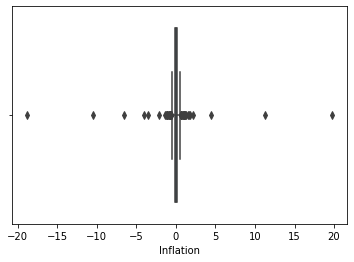

In [155]:
sns.boxplot(QonQ['Inflation'])

In [156]:
cpi_out = np.abs(stats.zscore(QonQ['Inflation']))
threshold = 3
print(np.where( cpi_out > threshold ))

(array([279, 342, 343, 404, 405], dtype=int64),)


In [157]:
QonQ['Inflation'][279], QonQ['Inflation'][342],QonQ['Inflation'][343],QonQ['Inflation'][404],QonQ['Inflation'][405]

(-10.459016393442623,
 19.696629213483146,
 11.216216216216218,
 -6.5592705167173255,
 -18.78813559322034)

In [158]:
droprows_two = [279, 342, 343, 404, 405]
QonQ.drop(QonQ.index[droprows_two], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

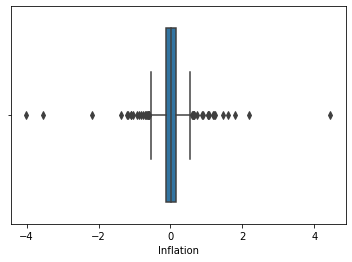

In [159]:
sns.boxplot(QonQ['Inflation'])

<AxesSubplot:xlabel='Inflation', ylabel='Count'>

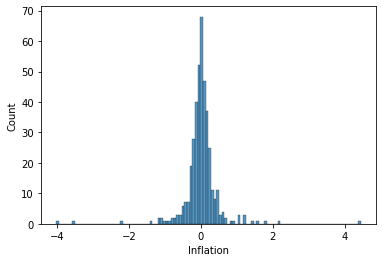

In [160]:
sns.histplot(data=QonQ['Inflation'])

In [161]:
# Still many outliers
cpi_out = np.abs(stats.zscore(QonQ['Inflation']))
threshold = 3
print(np.where( cpi_out > threshold ))

(array([245, 270, 271, 279, 343, 344, 346], dtype=int64),)


In [162]:
QonQ['Inflation'][245],QonQ['Inflation'][270],QonQ['Inflation'][271],QonQ['Inflation'][279],QonQ['Inflation'][343],QonQ['Inflation'][344],QonQ['Inflation'][346]

(-2.176245210727969,
 -4.020560747663551,
 -3.5338983050847466,
 1.807399347116431,
 1.596774193548387,
 2.1764705882352944,
 4.444444444444445)

In [163]:
droprows_three = [245, 270, 271, 279, 343, 344, 346]
QonQ.drop(QonQ.index[droprows_three], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

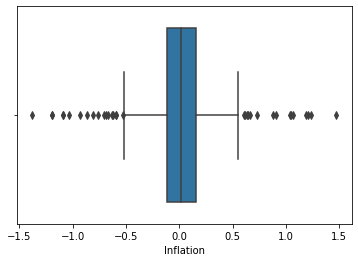

In [164]:
sns.boxplot(QonQ['Inflation'])

<AxesSubplot:xlabel='Inflation', ylabel='Count'>

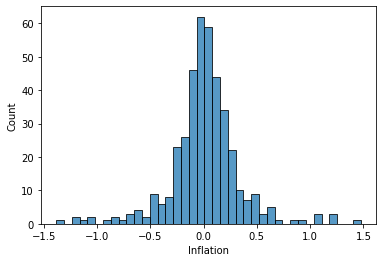

In [165]:
sns.histplot(data=QonQ['Inflation'])

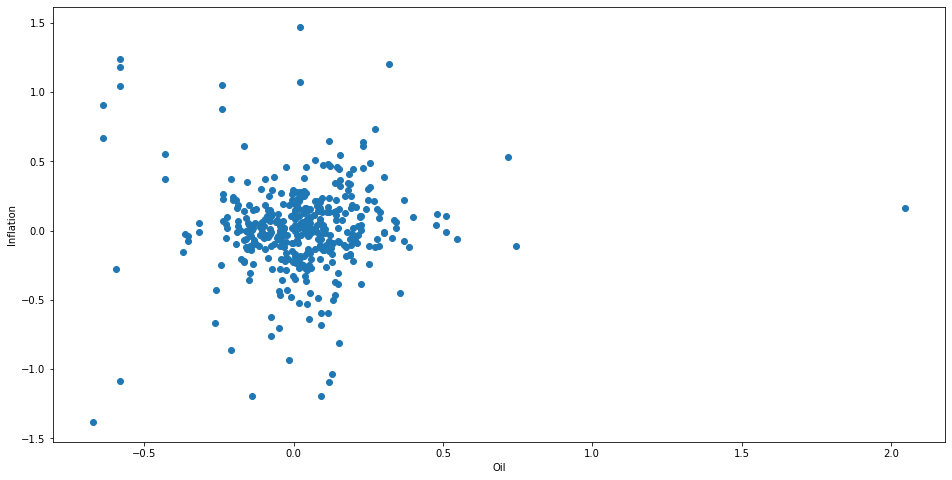

In [166]:
fig, ax =plt.subplots(figsize=(16,8))
ax.scatter(QonQ['WTI'], QonQ['Inflation'])
ax.set_xlabel('Oil')
ax.set_ylabel('Inflation')
plt.show()

In [167]:
# Checking to see if they were officially dropped
QonQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 402 entries, 1986-02-28 to 2020-10-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    402 non-null    float64
 1   USD          402 non-null    float64
 2   WTI          402 non-null    float64
 3   M2           402 non-null    float64
 4   Wage CPI     402 non-null    float64
 5   GDP          402 non-null    float64
 6   Cap Util     402 non-null    float64
 7   M2 Velocity  402 non-null    float64
dtypes: float64(8)
memory usage: 28.3 KB


In [168]:
QonQ = QonQ.sort_values(by="Date", ascending=False)
QonQ_all_csv = pd.DataFrame(QonQ)

QonQ_all_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_all.xlsx')
print('Finished')

Finished


# 2.5.2 pct changes | Quarter on Variables & Two Quarters on Inflation<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [169]:
# ( Complete ) Re-run on a 2 Quarter move in Inflation
# The others stay the same in this section so you can use the data from before
TQ_cpi = us_cpi.pct_change(periods=-6) * -1
# TQ_cpi.tail(45)

In [170]:
# Left Join but aware that Inflation reports when others are not so employed a forward fill on the variables

TQonQ = TQ_cpi.merge(QonQ_vars, how='left', on='Date')
cols = ['USD','WTI','M2','Wage CPI','GDP','Cap Util','M2 Velocity' ]
TQonQ.loc[:,cols] = TQonQ.loc[:,cols].ffill()
TQonQ.columns = ['Inflation','USD','WTI','M2','Wage CPI','GDP','Cap Util','M2 Velocity']
TQonQ = TQonQ.dropna()

In [171]:
TQonQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 414 entries, 1986-02-28 to 2020-07-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    414 non-null    float64
 1   USD          414 non-null    float64
 2   WTI          414 non-null    float64
 3   M2           414 non-null    float64
 4   Wage CPI     414 non-null    float64
 5   GDP          414 non-null    float64
 6   Cap Util     414 non-null    float64
 7   M2 Velocity  414 non-null    float64
dtypes: float64(8)
memory usage: 29.1 KB


In [172]:
TQonQ.tail()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
2020-03-31,-0.122538,0.026371,-0.671246,0.077814,-0.001970,-0.008564,-0.046807,-0.032235
2020-04-30,0.721658,0.012194,-0.638652,0.127995,-0.011448,-0.094662,-0.164406,-0.200579
2020-05-31,0.899574,0.012194,-0.638652,0.127995,-0.011448,-0.094662,-0.164406,-0.200579
2020-06-30,0.525698,-0.012056,0.717860,0.098473,-0.003327,-0.094662,-0.063696,-0.200579
2020-07-31,0.295714,-0.057630,2.046722,0.037880,0.011164,0.084535,0.117517,0.038949


In [173]:
# To reiterate; please be aware that M2 Velocity didn't see a change from Q4/85 to Q1/86 so Zero is not incorrect
TQonQ.head()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
1986-02-28,-0.977764,-0.090658,-0.581967,0.014179,0.005545,0.014356,0.004569,0.000000
1986-03-31,-0.286203,-0.064713,-0.595654,0.018631,-0.005520,0.014356,-0.012286,0.000000
1986-04-30,-0.080163,-0.085283,-0.315897,0.025222,-0.012832,0.008307,-0.016204,-0.017857
1986-05-31,-0.161215,-0.085283,-0.315897,0.025222,-0.012832,0.008307,-0.016204,-0.017857
1986-06-30,-0.608379,-0.056024,0.063228,0.026041,0.001850,0.008307,-0.003582,-0.017857


C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

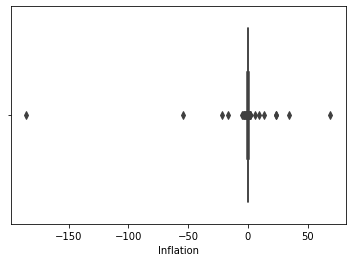

In [174]:
sns.boxplot(TQonQ['Inflation'])

In [175]:
TQ_cpi_out = np.abs(stats.zscore(TQonQ['Inflation']))
threshold = 3
print(np.where( TQ_cpi_out > threshold ))

(array([268, 269, 342, 345], dtype=int64),)


In [176]:
TQonQ['Inflation'][268],TQonQ['Inflation'][269],TQonQ['Inflation'][342],TQonQ['Inflation'][345]

(-54.18681318681319, -185.66666666666666, 69.0, 34.050000000000004)

In [177]:
droping_once = [268, 269, 342, 345]
TQonQ.drop(TQonQ.index[droping_once], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

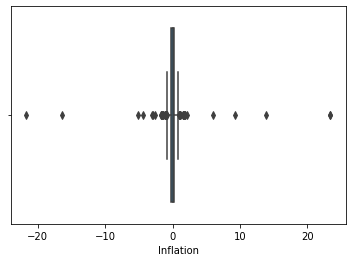

In [178]:
sns.boxplot(TQonQ['Inflation'])

In [179]:
TQ_cpi_out_second = np.abs(stats.zscore(TQonQ['Inflation']))
threshold = 3
print(np.where( TQ_cpi_out_second > threshold ))

(array([268, 269, 339, 340, 341, 401], dtype=int64),)


In [180]:
TQonQ['Inflation'][268],TQonQ['Inflation'][269],TQonQ['Inflation'][339],TQonQ['Inflation'][340],TQonQ['Inflation'][341],TQonQ['Inflation'][401]

(-21.762711864406782,
 13.856770833333334,
 23.382022471910112,
 23.405405405405407,
 9.319999999999999,
 -16.38135593220339)

In [181]:
droping_twice = [268, 269, 339, 340, 341, 401]
TQonQ.drop(TQonQ.index[droping_twice], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

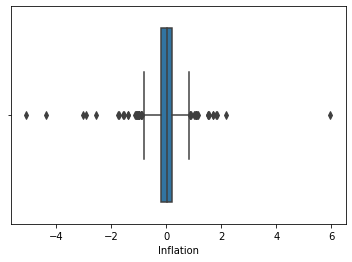

In [182]:
sns.boxplot(TQonQ['Inflation'])

In [183]:
TQ_cpi_out_third = np.abs(stats.zscore(TQonQ['Inflation']))
threshold = 3
print(np.where( TQ_cpi_out_third > threshold ))

(array([267, 268, 274, 337, 341, 395, 396], dtype=int64),)


In [184]:
TQonQ['Inflation'][267],TQonQ['Inflation'][268],TQonQ['Inflation'][274],TQonQ['Inflation'][337],TQonQ['Inflation'][341],TQonQ['Inflation'][395],TQonQ['Inflation'][396]

(-2.9028037383177567,
 5.959294436906377,
 -3.027322404371585,
 -5.096774193548387,
 2.1695906432748537,
 -4.361702127659575,
 -2.5371517027863777)

In [185]:
droping_third = [267, 268, 274, 337, 341, 395, 396]
TQonQ.drop(TQonQ.index[droping_third], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

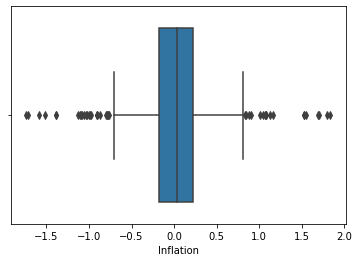

In [186]:
sns.boxplot(TQonQ['Inflation'])

In [187]:
TQ_cpi_out_fourth = np.abs(stats.zscore(TQonQ['Inflation']))
threshold = 3
print(np.where( TQ_cpi_out_fourth > threshold ))

(array([242, 267, 272, 273, 274, 275, 276, 279, 333, 334, 390], dtype=int64),)


In [188]:
TQonQ['Inflation'][270],TQonQ['Inflation'][272],TQonQ['Inflation'][332],TQonQ['Inflation'][385],TQonQ['Inflation'][386]

(1.1590296495956873,
 1.6969532100108813,
 -0.6089258698940996,
 0.12725499756216485,
 0.2787746170678338)

In [189]:
droping_fourth = [270, 272, 332, 385, 386]
TQonQ.drop(TQonQ.index[droping_fourth], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

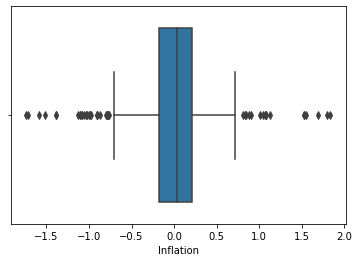

In [190]:
sns.boxplot(TQonQ['Inflation'])

<AxesSubplot:xlabel='Inflation', ylabel='Count'>

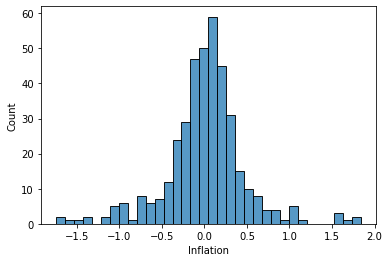

In [191]:
sns.histplot(data=TQonQ['Inflation'])

In [192]:
TQonQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 392 entries, 1986-02-28 to 2020-07-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    392 non-null    float64
 1   USD          392 non-null    float64
 2   WTI          392 non-null    float64
 3   M2           392 non-null    float64
 4   Wage CPI     392 non-null    float64
 5   GDP          392 non-null    float64
 6   Cap Util     392 non-null    float64
 7   M2 Velocity  392 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


In [193]:
# Variables are confirmed to be consistent to previous round for the non-Inflation #'s
# Inflation numbers were checked & accurate
# Thus ready to depart to a csv

TQonQ = pd.DataFrame(TQonQ)

TQonQ.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/TQonQ_all.xlsx')
print('Finished')

Finished


# 2.5.3 pct change | Variables Quarter ( rolling average ), 2 Quarters Inflation<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [194]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
USD_roll_avg = pd.Series(us_usd['Settle'].pct_change(periods=66)).rolling(66).mean()
WTI_roll_avg = pd.Series(us_wti['Last'].pct_change(periods=66)).rolling(66).mean()

# ( Complete ) Wkly | M2 
Q_M2_avg = pd.Series(us_M2.pct_change(periods=12)).rolling(12).mean()

# ( Complete ) Mnthly | Capital Utilization, Wages, Inflation
Q_caputil_avg = pd.Series(us_cap_util.pct_change(periods=3)).rolling(3).mean()
Q_wages_avg = pd.Series(us_wages_cpi.pct_change(periods=3)).rolling(3).mean()

Q_cpi_2 = us_cpi.pct_change(periods=-6) * -1

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_GDP_2 = us_gdp.pct_change(periods=1)
Q_velomoney_2 = m2_velo.pct_change(periods=1)


In [195]:
vars_roll = pd.concat([ USD_roll_avg,WTI_roll_avg,Q_M2_avg,Q_caputil_avg,Q_wages_avg,Q_GDP_2,Q_velomoney_2 ],
                        axis = 1, ignore_index=False)
vars_roll = vars_roll.fillna(method='ffill')
vars_roll.columns = ['USD','WTI','M2','Cap Util','Wage CPI','GDP','M2 Velocity']
vars_roll.index.names = ["Date"]
# main_df = main_df.sort_values(by="Date", ascending=False)

In [202]:
QonQ_roll = Q_cpi_2.merge(vars_roll, how='left', on='Date')
cols = ['Inflation','USD','WTI','M2','Cap Util','Wage CPI','GDP','M2 Velocity' ]
# QonQ_roll.loc[:,cols] = QonQ_roll.loc[:,cols].ffill()
QonQ_roll.columns = ['Inflation','USD','WTI','M2','Cap Util','Wage CPI','GDP','M2 Velocity']
QonQ_roll = QonQ_roll.dropna()

In [203]:
QonQ_roll.tail()

,Inflation,USD,WTI,M2,Cap Util,Wage CPI,GDP,M2 Velocity
Date,,,,,,,,
2020-01-31,-1.522312,-0.006506,0.047930,0.017374,-0.002764,0.006648,-0.008564,-0.032235
2020-03-31,-0.122538,0.004973,-0.162944,0.023476,-0.018873,0.001833,-0.008564,-0.032235
2020-04-30,0.721658,0.018070,-0.414056,0.051578,-0.073183,-0.003580,-0.094662,-0.200579
2020-06-30,0.525698,0.007394,-0.311010,0.129598,-0.128528,-0.009161,-0.094662,-0.200579
2020-07-31,0.295714,-0.018090,0.235285,0.113321,-0.034554,-0.001624,0.084535,0.038949


In [210]:
QonQ_roll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1986-06-30 to 2020-07-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    292 non-null    float64
 1   USD          292 non-null    float64
 2   WTI          292 non-null    float64
 3   M2           292 non-null    float64
 4   Cap Util     292 non-null    float64
 5   Wage CPI     292 non-null    float64
 6   GDP          292 non-null    float64
 7   M2 Velocity  292 non-null    float64
dtypes: float64(8)
memory usage: 20.5 KB


In [211]:
QonQ_roll.head()

,Inflation,USD,WTI,M2,Cap Util,Wage CPI,GDP,M2 Velocity
Date,,,,,,,,
1986-06-30,-0.608379,-0.047141,-0.186975,0.025516,-0.009038,-0.006724,0.008307,-0.017857
1986-07-31,-0.080137,-0.042388,-0.048645,0.026364,-0.003080,-0.000590,0.013713,-0.010795
1986-09-30,0.421695,-0.051423,0.015028,0.022977,0.000941,0.005251,0.013713,-0.010795
1986-10-31,0.610066,-0.046476,0.123254,0.021013,0.001004,0.005241,0.010842,-0.011488
1986-12-31,0.699425,-0.016384,0.131115,0.018498,0.007535,0.006451,0.010842,-0.011488


C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

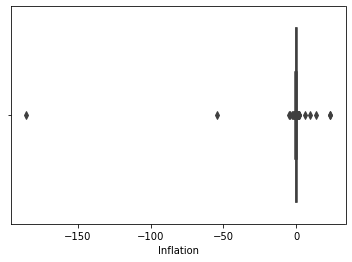

In [212]:
sns.boxplot(QonQ_roll['Inflation'])

In [213]:
clean_one = np.abs(stats.zscore(QonQ_roll['Inflation']))
threshold = 3
print(np.where( clean_one > threshold ))

(array([189, 190], dtype=int64),)


In [214]:
droping_one = [189, 190]
QonQ_roll.drop(QonQ_roll.index[droping_one], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

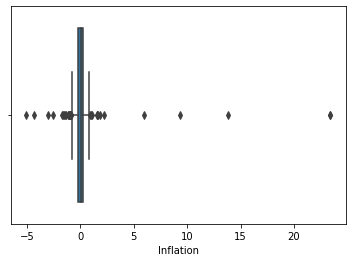

In [215]:
sns.boxplot(QonQ_roll['Inflation'])

In [216]:
clean_two = np.abs(stats.zscore(QonQ_roll['Inflation']))
threshold = 3
print(np.where( clean_two > threshold ))

(array([189, 239, 240, 241], dtype=int64),)


In [217]:
droping_two = [189, 239, 240, 241]
QonQ_roll.drop(QonQ_roll.index[droping_two], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

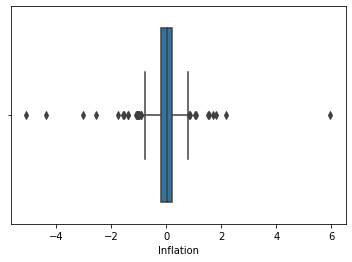

In [218]:
sns.boxplot(QonQ_roll['Inflation'])

In [219]:
clean_three = np.abs(stats.zscore(QonQ_roll['Inflation']))
threshold = 3
print(np.where( clean_three > threshold ))

(array([189, 192, 238, 279, 280], dtype=int64),)


In [220]:
droping_three = [189, 192, 238, 279, 280]
QonQ_roll.drop(QonQ_roll.index[droping_three], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

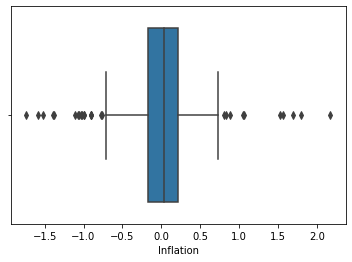

In [221]:
sns.boxplot(QonQ_roll['Inflation'])

In [229]:
clean_four = np.abs(stats.zscore(QonQ_roll['Inflation']))
threshold = 3
print(np.where( clean_four > threshold ))

(array([129, 190, 191, 192, 194, 233, 235, 272], dtype=int64),)


In [231]:
QonQ_roll['Inflation'][129],QonQ_roll['Inflation'][190],QonQ_roll['Inflation'][191],QonQ_roll['Inflation'][194],QonQ_roll['Inflation'][233],QonQ_roll['Inflation'][235],QonQ_roll['Inflation'][272]

(-1.3901581722319865,
 1.5244395442851892,
 1.6924871675221653,
 -1.5840455840455845,
 -1.740740740740741,
 2.1695906432748537,
 -1.5223123732251524)

In [232]:
droping_four = [235]
QonQ_roll.drop(QonQ_roll.index[droping_four], inplace=True)

C:\Users\rands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inflation'>

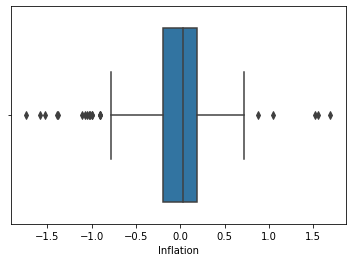

In [233]:
sns.boxplot(QonQ_roll['Inflation'])

<AxesSubplot:xlabel='Inflation', ylabel='Count'>

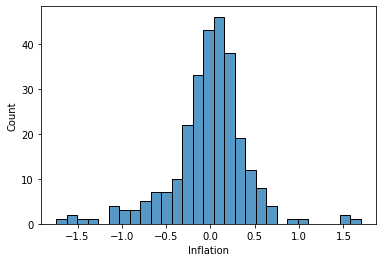

In [234]:
sns.histplot(data=QonQ_roll['Inflation'])

In [235]:
QonQ_roll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 1986-06-30 to 2020-04-30
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    274 non-null    float64
 1   USD          274 non-null    float64
 2   WTI          274 non-null    float64
 3   M2           274 non-null    float64
 4   Cap Util     274 non-null    float64
 5   Wage CPI     274 non-null    float64
 6   GDP          274 non-null    float64
 7   M2 Velocity  274 non-null    float64
dtypes: float64(8)
memory usage: 19.3 KB


In [236]:
# Numbers are correct
# Ready to depart to a csv

QonQ_roll = pd.DataFrame(QonQ_roll)

QonQ_roll.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/TQonQ_roll.xlsx')
print('Finished')

Finished


# 2.5.4 pct changes | Two Quarter on All<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [1273]:
# ( Complete ) Daily | USD & WTI | removed 48 days from 180 ( i.e. weekends ) but doesn't include holidays
TQ_USD = us_usd['Settle'].pct_change(periods=132)
TQ_WTI = us_wti['Last'].pct_change(periods=132)

# ( Complete ) Wkly | M2 
TQ_M2 = us_M2.pct_change(periods=24)

# ( Complete ) Mnthly | Capital Utilization, Wages
TQ_caputil = us_cap_util.pct_change(periods=6)
TQ_wages = us_wages_cpi.pct_change(periods=6)
# Inflation was done before but will setup a new variable
TQ_cpi_second = us_cpi.pct_change(periods=-6) * -1

# ( Complete ) Quarterly | GDP, Velocity of Money
TQ_GDP = us_gdp.pct_change(periods=2)
TQ_velomoney = m2_velo.pct_change(periods=2)

In [1274]:
TQonTQ_vars = pd.concat([TQ_USD,TQ_WTI,TQ_M2,TQ_wages,TQ_GDP,TQ_caputil,TQ_velomoney],
                      axis = 1, ignore_index=False)

TQonTQ_vars = TQonTQ_vars.fillna(method='ffill')
TQonTQ_vars.columns = ['USD','WTI','M2','Wage CPI','GDP','Cap Util','M2 Velocity']
TQonTQ_vars.index.names = ["Date"]

In [1275]:
TQonTQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8256 entries, 1989-08-17 to 2021-02-09
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   USD          8256 non-null   float64
 1   WTI          8256 non-null   float64
 2   M2           8256 non-null   float64
 3   Wage CPI     8256 non-null   float64
 4   GDP          8256 non-null   float64
 5   Cap Util     8256 non-null   float64
 6   M2 Velocity  8256 non-null   float64
dtypes: float64(7)
memory usage: 516.0 KB


In [1277]:
TQonTQ.head()

,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,
1989-08-17,0.059055,0.055367,0.026634,0.024106,0.033407,-0.014975,0.007065
1989-08-18,0.064671,0.074900,0.026634,0.024106,0.033407,-0.014975,0.007065
1989-08-21,0.055032,0.097182,0.025123,0.024106,0.033407,-0.014975,0.007065
1989-08-22,0.049953,0.115137,0.025123,0.024106,0.033407,-0.014975,0.007065
1989-08-23,0.069393,0.068789,0.025123,0.024106,0.033407,-0.014975,0.007065


In [1227]:
# To delete the null values, I took the most ( Inflation ) & subtracted it by the least ( USD )
# 11,435 - 9,211 = 2,224
TQonTQ = TQonTQ.iloc[2224:,]

In [1228]:
TQonTQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8256 entries, 1989-08-17 to 2021-02-09
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   USD          8256 non-null   float64
 1   WTI          8256 non-null   float64
 2   M2           8256 non-null   float64
 3   Wage CPI     8256 non-null   float64
 4   GDP          8256 non-null   float64
 5   Cap Util     8256 non-null   float64
 6   M2 Velocity  8256 non-null   float64
dtypes: float64(7)
memory usage: 516.0 KB


In [995]:
# They are okay less WTI & USD off by overshooting 6 & 3 days respectively
TQonTQ.tail()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
2021-02-03,0.525698,-0.020009,0.343337,0.060825,0.015769,0.100379,0.082358,0.022645
2021-02-04,0.525698,-0.019299,0.374391,0.060825,0.015769,0.100379,0.082358,0.022645
2021-02-05,0.525698,-0.026469,0.381171,0.060825,0.015769,0.100379,0.082358,0.022645
2021-02-08,0.525698,-0.026334,0.440615,0.060825,0.015769,0.100379,0.082358,0.022645
2021-02-09,0.525698,-0.026074,0.443977,0.060825,0.015769,0.100379,0.082358,0.022645


In [996]:
# They are okay less WTI & USD off by overshooting 6 & 3 days respectively
TQonTQ.head()

,Inflation,USD,WTI,M2,Wage CPI,GDP,Cap Util,M2 Velocity
Date,,,,,,,,
1986-06-02,-0.161215,-0.086994,-0.553508,0.042015,-0.00368,0.022782,-0.015824,-0.017857
1986-06-03,-0.161215,-0.092819,-0.557011,0.042015,-0.00368,0.022782,-0.015824,-0.017857
1986-06-04,-0.161215,-0.088842,-0.587011,0.042015,-0.00368,0.022782,-0.015824,-0.017857
1986-06-05,-0.161215,-0.098547,-0.570733,0.042015,-0.00368,0.022782,-0.015824,-0.017857
1986-06-06,-0.161215,-0.100420,-0.587189,0.042015,-0.00368,0.022782,-0.015824,-0.017857


In [997]:
# Variables ( all ) confirmed "roughly" okay
# Thus ready to depart to a csv

TQonTQ_excel = pd.DataFrame(TQonTQ)

TQonTQ_excel.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/TQonTQ.xlsx')
print('Finished')

Finished
